In [1]:
import matplotlib.pyplot as plt
import numpy as np

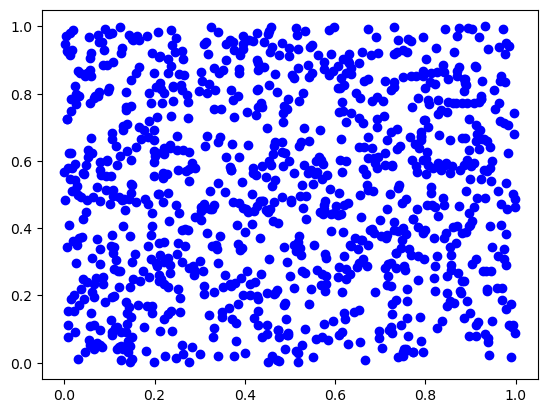

In [2]:
#unifrom dist with fixed seed to repeat the same results
np.random.seed(46)
N = 1000
x1 = np.random.uniform(0, 1, N)
y1 = np.random.uniform(0,1, N)
plt.plot(x1,y1, 'bo')

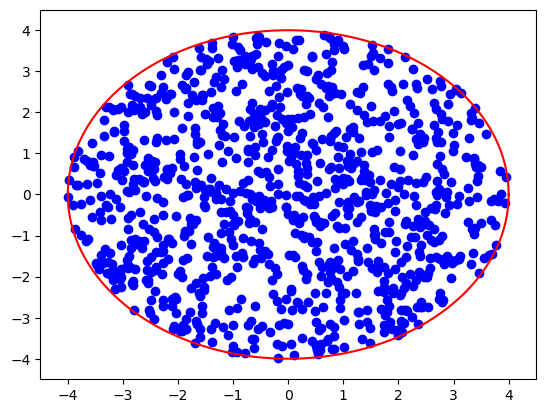

In [3]:
r1 = 4 #radius of circular distribution
pi = np.pi
#xytransition functions
x2 = r1*np.sqrt(x1)*np.cos(2*pi*y1)
y2 = r1*np.sqrt(x1)*np.sin(2*pi*y1)
# a mathematical circle as to check the boundary of point transitions
angle = np.linspace( 0 , 2 * np.pi , 150 )  
xx = r1 * np.cos( angle ) 
yy = r1 * np.sin( angle )
#xy plotting
plt.figure()
plt.plot(x2,y2, 'bo')
plt.plot(xx, yy, 'r')
plt.xlim( -4.5 , 4.5 ) 
plt.ylim( -4.5 , 4.5 )
plt.show()

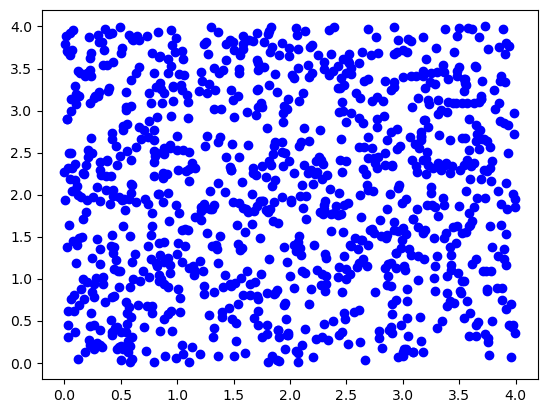

In [4]:
#scaling uniform dist. for hex transition
r2 = 2 #radius of hex
r_ref = 2 # a radius number for scaling
xx2 = x1*r2*r_ref
yy2 = y1*r2*r_ref
plt.plot(xx2,yy2, 'bo')

line one slope is 0.9999999999999998
line one intercept is 2.0
line two slope is 0.0
line two intercept is 0.0
 
-1 x + 2
 
1 x + 2
 
0


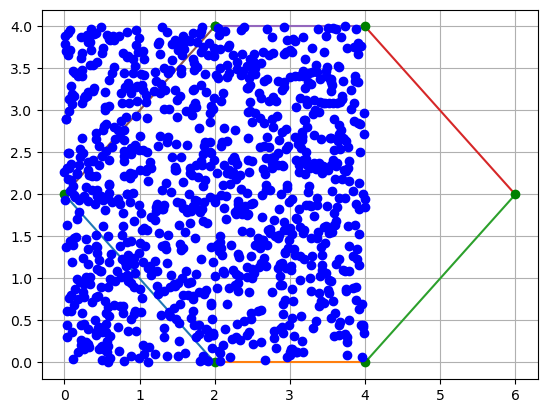

In [5]:
# hex coordinates for fitting lines
l1_x = np.inner([0,1], r_ref)
l1_y = np.inner([1,0], r_ref)
l2_x = np.inner([1,2], r_ref)
l2_y = np.inner([0,0], r_ref)
l3_x = np.inner([2,3], r_ref)
l3_y = np.inner([0,1], r_ref)
l4_x = np.inner([3,2], r_ref)
l4_y = np.inner([1,2], r_ref)
l5_x = np.inner([2,1], r_ref)
l5_y = np.inner([2,2], r_ref)
l6_x = np.inner([0,1], r_ref)
l6_y = np.inner([1,2], r_ref)
# fit lines and retrive coefficients coef#[0] --> slope / coef#[1] --> intercept
coef1 = np.polyfit(l1_x, l1_y, 1)
coef2 = np.polyfit(l2_x, l2_y, 1)
coef3 = np.polyfit(l3_x, l3_y, 1)
coef4 = np.polyfit(l4_x, l4_y, 1)
coef5 = np.polyfit(l5_x, l5_y, 1)
coef6 = np.polyfit(l6_x, l6_y, 1)
#check coefficients
print('line one slope is', coef6[0])
print('line one intercept is', coef6[1])
print('line two slope is', coef2[0])
print('line two intercept is', coef2[1])
# define one order polinomial functions
poly1 = np.poly1d(coef1)
poly2 = np.poly1d(coef2)
poly3 = np.poly1d(coef3)
poly4 = np.poly1d(coef4)
poly5 = np.poly1d(coef5)
poly6 = np.poly1d(coef6)
# check fitted lines
print(poly1)
print(poly6)
print(poly2)
#xy points for plotting
x_axis1 = np.linspace(0 * r_ref , 1 * r_ref, 50)
x_axis2 = np.linspace(1 * r_ref, 2 * r_ref, 50)
x_axis3 = np.linspace(2 *r_ref , 3 * r_ref, 50)
y_axis1 = poly1(x_axis1)
y_axis2 = poly2(x_axis2)
y_axis3 = poly3(x_axis3)
y_axis4 = poly4(x_axis3)
y_axis5 = poly5(x_axis2)
y_axis6 = poly6(x_axis1)
#plotting
plt.plot(x_axis1, y_axis1)
plt.plot(x_axis2, y_axis2)
plt.plot(x_axis3, y_axis3)
plt.plot(x_axis3, y_axis4)
plt.plot(x_axis2, y_axis5)
plt.plot(x_axis1, y_axis6)
plt.plot( l1_x[0], l1_y[0], 'go' )
plt.plot( l1_x[1], l1_y[1], 'go' )
plt.plot( l2_x[1], l2_y[1], 'go' )
plt.plot( l3_x[1], l3_y[1], 'go' )
plt.plot( l4_x[1], l4_y[1], 'go' )
plt.plot( l5_x[1], l5_y[1], 'go' )
plt.plot( l6_x[1], l6_y[1], 'go' )
plt.plot(xx2,yy2, 'bo')
plt.grid('on')
plt.show()

In [6]:
#computing distance between left right lines and points 
d1 = (-coef1[0] * xx2 + yy2 - coef1[1])
ind1 = np.where(d1 < 0) #selecting point indices outside boundary of first line to shift
d2 = (-coef6[0] * xx2 + yy2 - coef6[1]) 
ind2 = np.where(d2 > 0) #selecting point indices outsie boundary of second line to shift

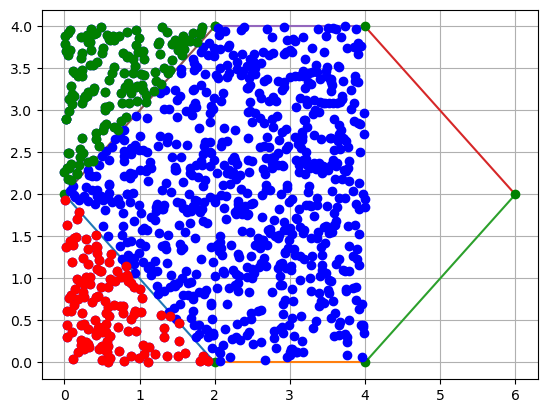

In [7]:
#plotting point selection results
plt.plot(x_axis1, y_axis1)
plt.plot(x_axis2, y_axis2)
plt.plot(x_axis3, y_axis3)
plt.plot(x_axis3, y_axis4)
plt.plot(x_axis2, y_axis5)
plt.plot(x_axis1, y_axis6)
plt.plot( l1_x[0], l1_y[0], 'go' )
plt.plot( l1_x[1], l1_y[1], 'go' )
plt.plot( l2_x[1], l2_y[1], 'go' )
plt.plot( l3_x[1], l3_y[1], 'go' )
plt.plot( l4_x[1], l4_y[1], 'go' )
plt.plot( l5_x[1], l5_y[1], 'go' )
plt.plot( l6_x[1], l6_y[1], 'go' )
plt.plot(xx2,yy2, 'bo')
plt.plot(xx2[ind1],yy2[ind1], 'ro')
plt.plot(xx2[ind2],yy2[ind2], 'go')
plt.grid('on')
plt.show()

In [8]:
#xy shifts upper and bottom right hand point outside the boundary of hex 
xx3 = xx2[ind1] + 2 * r_ref
yy3 = yy2[ind1] + 1 * r_ref
xx4 = xx2[ind2] + 2 * r_ref
yy4 = yy2[ind2] - 1 * r_ref

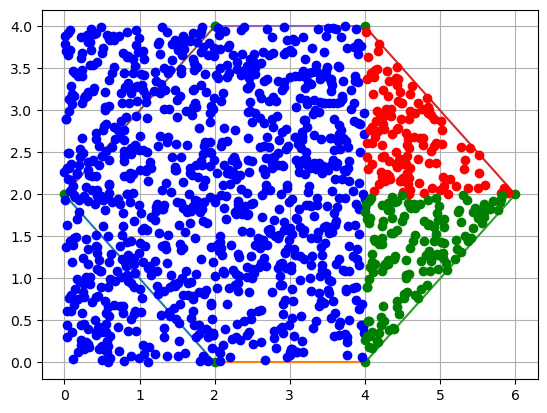

In [9]:
#plotting shifted poinrs in red color
plt.plot(x_axis1, y_axis1)
plt.plot(x_axis2, y_axis2)
plt.plot(x_axis3, y_axis3)
plt.plot(x_axis3, y_axis4)
plt.plot(x_axis2, y_axis5)
plt.plot(x_axis1, y_axis6)
plt.plot( l1_x[0], l1_y[0], 'go' )
plt.plot( l1_x[1], l1_y[1], 'go' )
plt.plot( l2_x[1], l2_y[1], 'go' )
plt.plot( l3_x[1], l3_y[1], 'go' )
plt.plot( l4_x[1], l4_y[1], 'go' )
plt.plot( l5_x[1], l5_y[1], 'go' )
plt.plot( l6_x[1], l6_y[1], 'go' )
plt.plot(xx2,yy2, 'bo')
plt.plot(xx3,yy3,'ro')
plt.plot(xx4,yy4,'go')
plt.grid('on')
plt.show()

In [10]:
#delete outside boundary points and concatenate remained uniform distributed points 
ind = ind1 + ind2
ind = np.concatenate(ind)
xx5 = np.delete(xx2, ind)
yy5 = np.delete(yy2, ind)
xxf = np.concatenate((xx5,xx3,xx4))
yyf = np.concatenate((yy5,yy3,yy4))

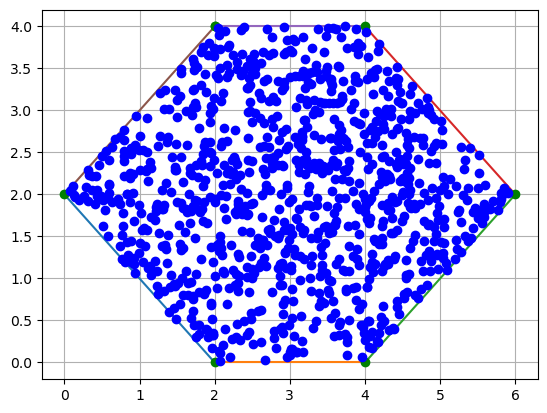

In [11]:
#plotting final result 
plt.plot(x_axis1, y_axis1)
plt.plot(x_axis2, y_axis2)
plt.plot(x_axis3, y_axis3)
plt.plot(x_axis3, y_axis4)
plt.plot(x_axis2, y_axis5)
plt.plot(x_axis1, y_axis6)
plt.plot( l1_x[0], l1_y[0], 'go' )
plt.plot( l1_x[1], l1_y[1], 'go' )
plt.plot( l2_x[1], l2_y[1], 'go' )
plt.plot( l3_x[1], l3_y[1], 'go' )
plt.plot( l4_x[1], l4_y[1], 'go' )
plt.plot( l5_x[1], l5_y[1], 'go' )
plt.plot( l6_x[1], l6_y[1], 'go' )
plt.plot(xxf,yyf, 'bo')
plt.grid('on')
plt.show()